# Task 5: Exploratory Data Analysis (EDA)

Objective: Extract insights using visual and statistical exploration.

Dataset Used: Titanic Dataset

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Data Loading & Initial Checks

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


#### a. Use .describe(), .info(), .value_counts()

In [4]:
print("Basic Statistics:")
df.describe()

Basic Statistics:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.964000,38.458000,2.032000,2.005000,247.968650,0.492000
std,288.819436,0.820596,23.103723,1.424431,1.410306,139.301211,0.500186
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,250.750000,1.000000,19.000000,1.000000,1.000000,126.295000,0.000000
50%,500.500000,2.000000,36.500000,2.000000,2.000000,246.500000,0.000000
75%,750.250000,3.000000,59.000000,3.000000,3.000000,365.662500,1.000000
max,1000.000000,3.000000,79.000000,4.000000,4.000000,499.780000,1.000000


Observation: Basic Statistics (Summary Table)

- Average passenger age is around 38 years, and the average fare paid is about ₹248.

- Most passengers belonged to Pclass 1 or 2, and the survival rate is close to 49%.

- Fare and age show wide variation (high standard deviation), while family members onboard (SibSp, Parch) mostly range between 0 and 4.

In [5]:
print("Dataset Info:")
df.info()  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


Observation: Dataset Info (Structure Overview)

- The dataset contains 1000 entries and 11 columns with no missing values.

- Features include a mix of numerical (int, float) and categorical (object) types.

- Major numerical columns are PassengerId, Pclass, Age, SibSp, Parch, Fare, Survived, while Name, Sex, Ticket, and Embarked are categorical.

In [6]:
print("Categorical Value Counts:")
print("\n", df['Embarked'].value_counts(), sep='\n')
print("\n", df['Sex'].value_counts(), sep='\n')

Categorical Value Counts:


Embarked
Q    362
C    328
S    310
Name: count, dtype: int64


Sex
male      527
female    473
Name: count, dtype: int64


Observation: Categorical Value Counts

- Gender: Slightly more males (527) than females (473).

- Embarked: Most passengers boarded at Queenstown (Q: 362).

In [7]:
# Check missing values
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [8]:
# Drop unncessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [9]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,17,4,2,144.08,Q,1
1,1,male,60,2,2,249.04,S,0
2,3,male,64,0,0,50.31,Q,1
3,3,male,35,4,0,235.20,C,1
4,1,female,70,0,3,160.17,C,1


### Step 3: Univariate Analysis

#### d. Plot histograms, boxplots, Scatter Plot

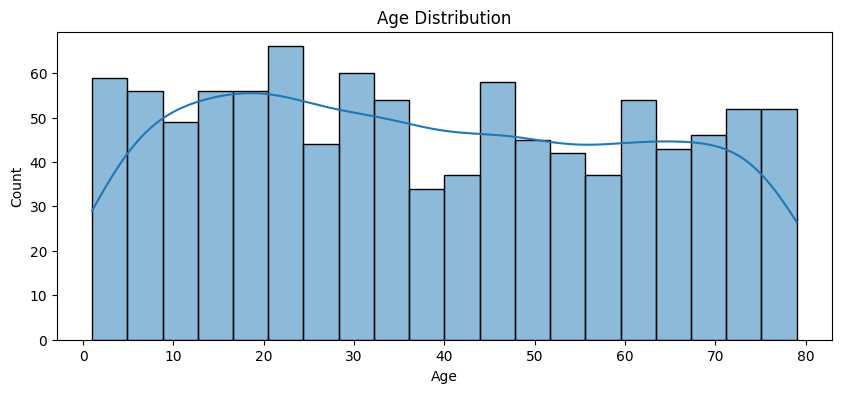

In [10]:
# Age Distribution (Histogram)
plt.figure(figsize=(10,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Observation: Age Distribution (Histogram with KDE Line)
- The age distribution is fairly uniform across different age groups, with slight peaks around 0–10 years, 20–30 years, and 60–70 years.
- The density curve shows mild fluctuations but no sharp skew — indicating a balanced presence of young, middle-aged, and elderly passengers.

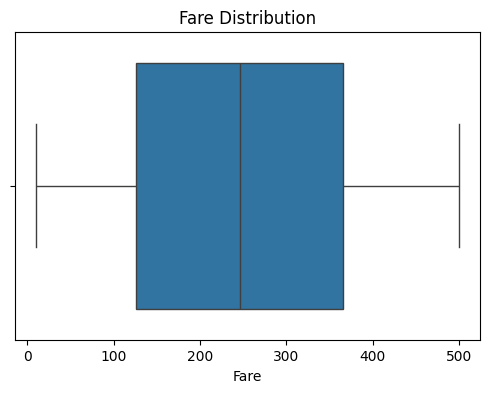

In [11]:
# Fare Distribution (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

Observation: Fare Distribution (Boxplot)

- Fare values are widely spread between around ₹10 and ₹500.

- The median fare is close to ₹250, indicating many passengers paid moderate fares.

- No major outliers are visible, suggesting a fairly even distribution of ticket prices within the dataset.

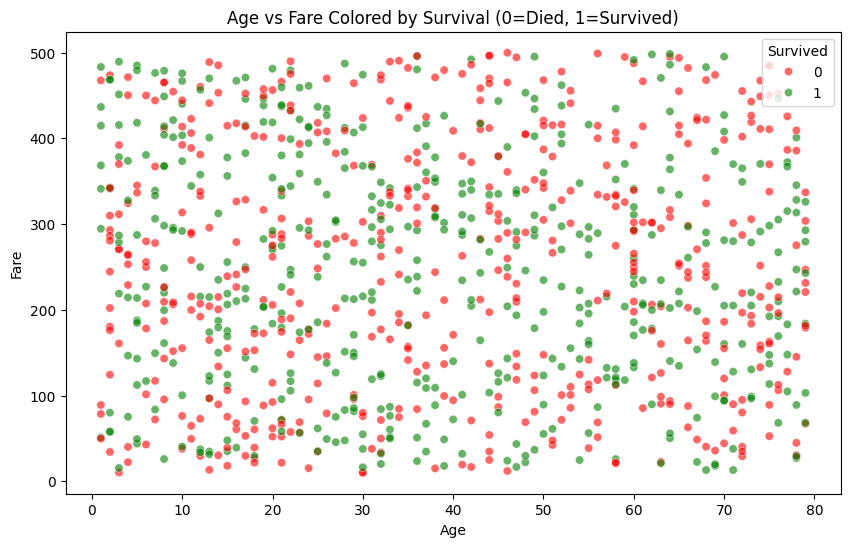

In [12]:
# Scatter Plot (Age vs Fare with Survival Hue)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', 
                data=df, palette={0:'red', 1:'green'}, alpha=0.6)
plt.title('Age vs Fare Colored by Survival (0=Died, 1=Survived)')
plt.legend(title='Survived')
plt.show()

Observation: Scatter Plot (Age vs Fare Colored by Survival)

- Survivors (green) are relatively more concentrated in higher fare ranges.

- Non-survivors (red) are more evenly spread across all fare and age groups.

- Fare, rather than age, shows a stronger link to survival chances.

### Step 4: Bivariate Analysis

#### c. Identify relationships and trends

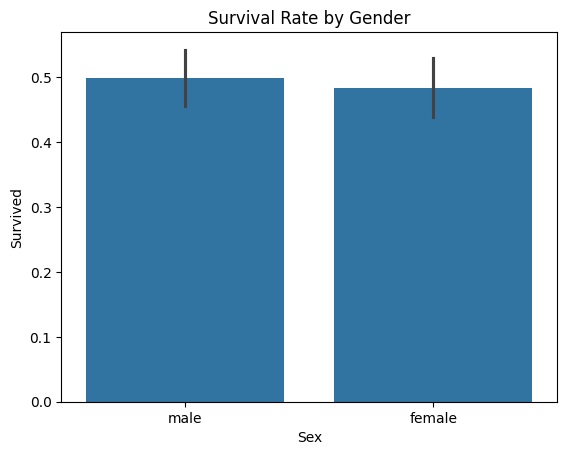

In [13]:
# Survival vs Sex (Barplot)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

Observation: Survival Rate by Gender (Bar Plot)

- Male and female survival rates are very close, around 50% each.

- Slightly higher survival observed for males in this dataset, which is unusual compared to typical Titanic datasets.

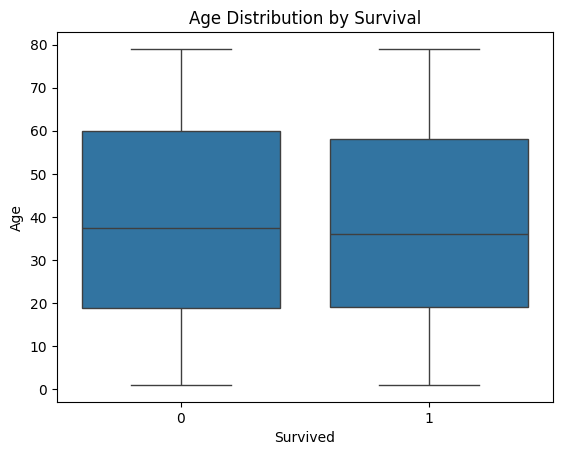

In [14]:
# Age vs Survival (Boxplot)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

Observation: Age Distribution by Survival (Boxplot)

- Age distributions for survivors and non-survivors are very similar, covering a wide range (0–79 years).

- Median age of survivors is slightly lower than that of non-survivors, suggesting younger passengers had a small advantage in survival.

### Step 5: Multivariate Analysis

#### b. Use sns.pairplot(), sns.heatmap()

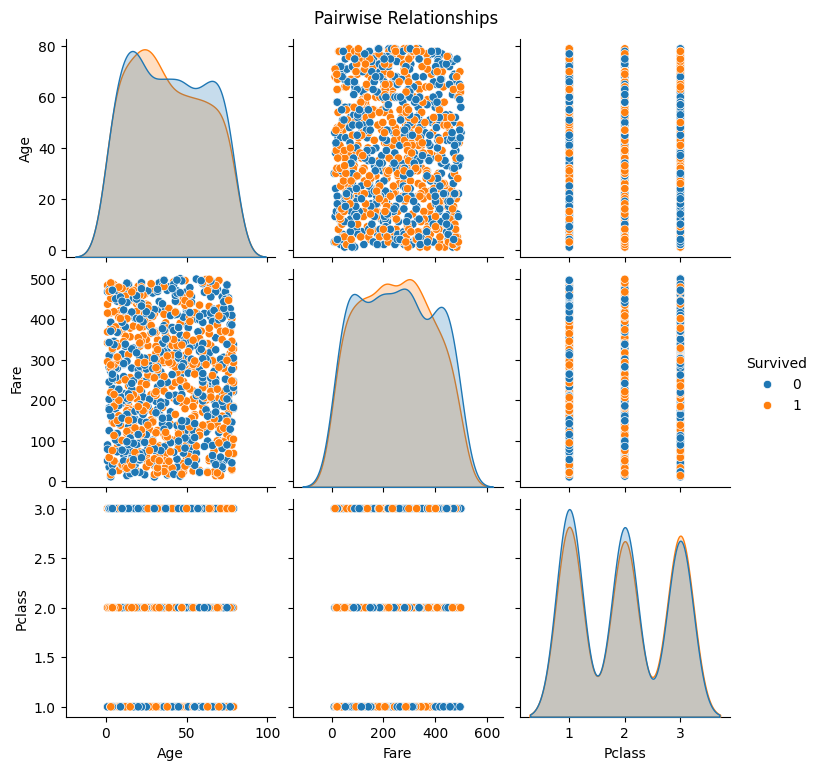

In [15]:
# Pairplot for numerical features
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

Observation: Pairwise Relationships (Pairplot)

- Survivors (orange) are more frequent among lower Pclass (1st class) and higher fare groups.

- Age shows no strong separation between survived and non-survived.

- Pclass and Fare together show a clearer trend: higher class and higher fare passengers had better survival chances.

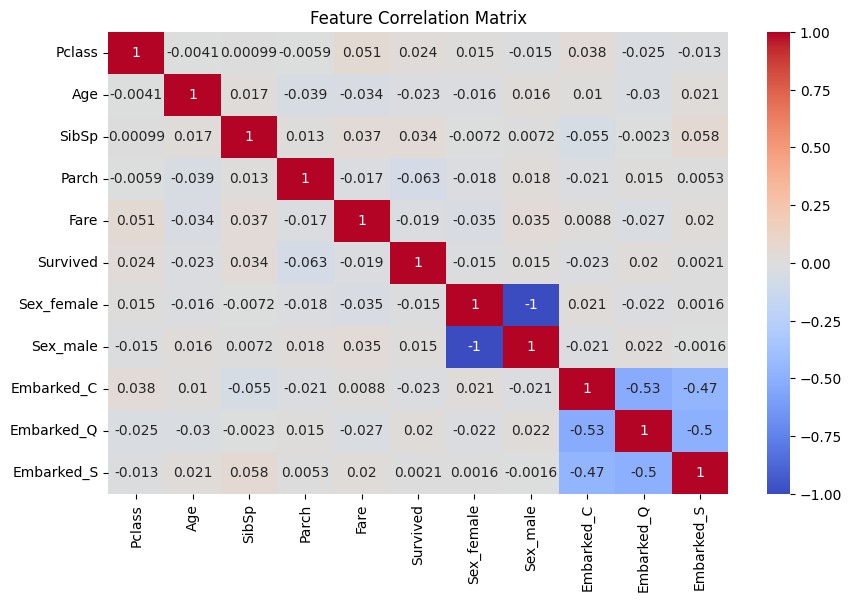

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.get_dummies(df, columns=['Sex', 'Embarked']).corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

Observation: Feature Correlation Matrix (Heatmap)

- Features have very weak correlations overall with survival.

- Sex_female shows a positive link to survival, and Sex_male shows a negative link (perfect opposites).

- Strong negative correlations observed between different Embarked categories due to one-hot encoding.